## Simple Linear Regression Using PyTorch

We will be following the below steps:
- 1. Data Preparation
- 2. Model Creation
- 3. Setup Loss Function and Optimizer
- 4. Training and Testing Loop
- 5. Evaluation

In [1]:
# Importing necessary dependencies and libraries
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Device agnostic code (if GPU is availabel)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### 1. Data Preparation

In [3]:
# Import dataset
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
X = torch.tensor(df.iloc[:, 1:-1].values,
                 dtype=torch.float32)
y = torch.tensor(df.iloc[:, -1].values,
                 dtype=torch.float32)

In [5]:
X[:5]

tensor([[1.2000],
        [1.4000],
        [1.6000],
        [2.1000],
        [2.3000]])

In [6]:
y[:5]

tensor([39344., 46206., 37732., 43526., 39892.])

In [7]:
# Splitting data into train and test set
train_split = int(len(X)*0.8)
X_train, y_train, X_test, y_test = X[:train_split], y[:train_split], X[train_split:], y[train_split:]

In [8]:
len(X_train), len(y_train), len(X_test), len(y_test)

(24, 24, 6, 6)

In [9]:
# Predictions Plot Function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(6,5))

  # Plot training data
  plt.scatter(train_data, train_label, color='r', s=4, label="Training Data")

  # Plot testing data
  plt.scatter(test_data, test_label, color='g', s=4, label="Testing Data")

  # Plot predictions if exists
  if predictions is not None:
    plt.scatter(test_data, predictions, color='orange', s=4, label="Predictions")

  plt.title("Plot Predictions")
  plt.xlabel("Feature (X)")
  plt.ylabel("Target (y)")

  plt.legend()
  plt.show()

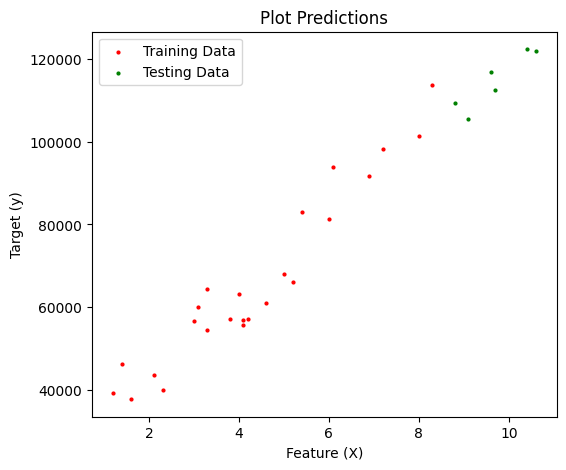

In [10]:
plot_predictions()

### 2. Model Creation

In [11]:
# Creating a linear regression model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class LinearRegressionModel(nn.Module):
  def __init__(self):
    # Inherit all the attributes and methods from nn.Module class
    super().__init__()

    # Set up linear layers
    self.linear_layer = nn.Linear(in_features=1, out_features=1)
    self.weights = nn.Parameter(torch.rand(1,
                                 requires_grad=True,
                                 dtype=torch.float)*20000) # since salary is in the range of 10000
    self.bias = nn.Parameter(torch.rand(1,
                                 requires_grad=True,
                                 dtype=torch.float)*100)

  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [12]:
# Instantiate the model
model_0 = LinearRegressionModel()
model_0

LinearRegressionModel(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
model_0.state_dict()

OrderedDict([('weights', tensor([7657.2754])),
             ('bias', tensor([95.9306])),
             ('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([24, 1]), torch.Size([24]), torch.Size([6, 1]), torch.Size([6]))

### 3. Setup Loss Function & Optimizer

In [15]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=1) # lr was also set through hit and trial

### 4. Training and Testing Loop

In [16]:
# Set up training and testing loop
from tqdm.auto import tqdm
epochs = 45000 # this was set manually by hit and trail
epoch_count = []
train_loss_value = []
test_loss_value = []

for epoch in tqdm(range(epochs)):
  ### Training Loop ###
  epoch_count.append(epoch)

  # 1. Forward Pass
  model_0.train()
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  train_loss = loss_fn(y_pred, y_train.unsqueeze(dim=1))
  train_loss_value.append(train_loss)

  # 3. Set zero_grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  train_loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing Loop ###
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)
    #print(f"test_pred shape: {y_pred.shape}")
    test_loss = loss_fn(test_pred, y_test.unsqueeze(dim=1)) #unsqueeze(dim=1) adds a new dimension to a tensor at index 1.
    test_loss_value.append(test_loss)

  ### Display what's happening ###
  if epoch % 5000 == 0:
    print(f"\nEpoch: {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}")

  0%|          | 0/45000 [00:00<?, ?it/s]


Epoch: 0 | Train Loss: 32960.1484375 | Test Loss: 40432.12890625

Epoch: 5000 | Train Loss: 7908.41748046875 | Test Loss: 11265.1943359375

Epoch: 10000 | Train Loss: 6829.23095703125 | Test Loss: 14776.0859375

Epoch: 15000 | Train Loss: 5942.57177734375 | Test Loss: 12514.3935546875

Epoch: 20000 | Train Loss: 5405.69287109375 | Test Loss: 7226.50244140625

Epoch: 25000 | Train Loss: 4988.365234375 | Test Loss: 5484.06787109375

Epoch: 30000 | Train Loss: 4980.64013671875 | Test Loss: 3479.385498046875

Epoch: 35000 | Train Loss: 4980.10205078125 | Test Loss: 3349.923095703125

Epoch: 40000 | Train Loss: 4979.59130859375 | Test Loss: 3286.307373046875


### 5. Evaluation

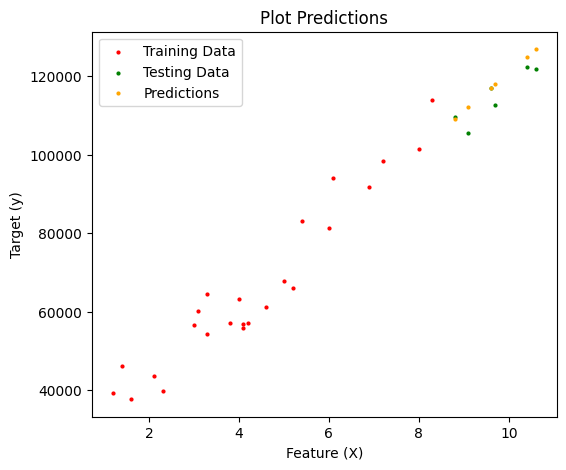

In [17]:
# Evaluation
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

plot_predictions(predictions=y_preds)

In [18]:
model_0.state_dict()['weights'], model_0.state_dict()['bias']

(tensor([9797.6201]), tensor([22945.4453]))

In [19]:
# Model parameters after training
weight_optimized = model_0.state_dict()['weights']
bias_optimized = model_0.state_dict()['bias']
X_points = X
y_points = y

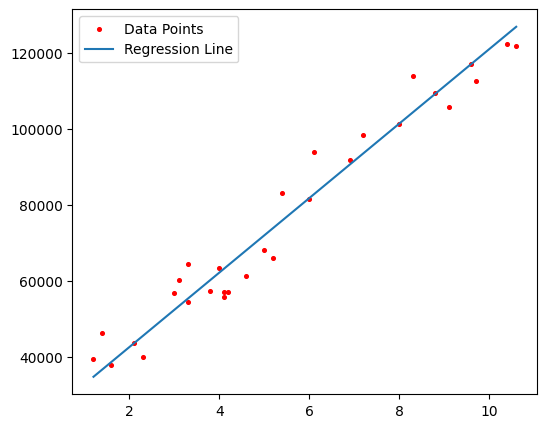

In [20]:
# Plot the regression line
plt.figure(figsize=(6,5))
plt.scatter(X_points, y_points, color='r', s=7, label="Data Points")
y_res = weight_optimized * X_points + bias_optimized
plt.plot(X_points, y_res, label="Regression Line")

plt.legend()
plt.show()

In [21]:
train_loss_value = torch.tensor(train_loss_value).numpy()
test_loss_value = torch.tensor(test_loss_value).numpy()
epoch_count = torch.tensor(epoch_count).numpy()

In [22]:
train_loss_value[:5]

array([32960.15 , 32954.81 , 32949.465, 32944.125, 32938.785],
      dtype=float32)

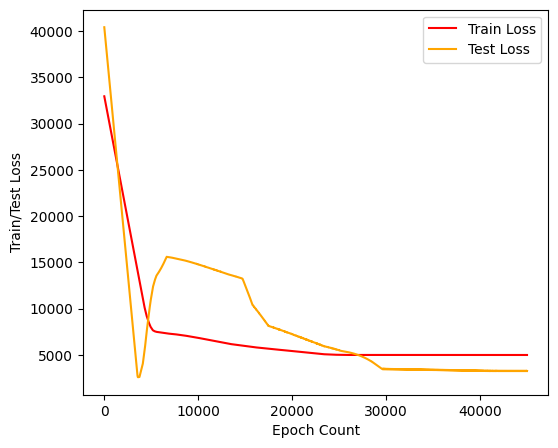

In [23]:
# Plot Epoch V/S Loss Curve
plt.figure(figsize=(6,5))

plt.plot(epoch_count, train_loss_value, color='r', label="Train Loss")
plt.plot(epoch_count, test_loss_value, color='orange', label="Test Loss")

plt.xlabel("Epoch Count")
plt.ylabel("Train/Test Loss")

plt.legend()
plt.show()